# Classification image using CNN 


## Introduction
Image Classification is familiar problem in Computer Vision field. Image classification is the task of assigning an input image one label from a fixed set of categories. This application is applied in a large variety of practical. 


In previous practive, we have already create our own model and train it. But the result may be not good cause a lot of issues affect to the performance such as data, computer power,... Keras supply a trained model which we can reuse to server our purpose. This practive is using VGG16 network, one of the most popular network in deeplearning. We can get more information about the trainned network in [here](https://keras.io/applications/).  

## import library


In [1]:
from keras.applications import vgg16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt




Using TensorFlow backend.


## Load image

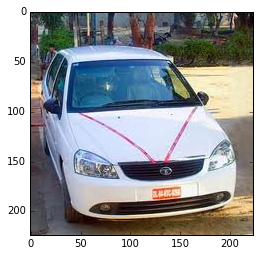

In [2]:
img_path = 'car2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

## Load pretrained model VGG16

In [3]:
model = vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()


 48873472/553467096 [=>............................] - ETA: 1308s

error: [Errno 104] Connection reset by peer

## Get prediction from our model

In [ ]:

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
P = decode_predictions(preds)
(imagenetID, label, prob) = P[0][0]
print(label)

## Visualize
We will visualize what we get after the image is processed at the choosen layer

## Choosing layer


In [ ]:
from keras.models import Model


model_layer = Model(output=model.get_layer('block1_conv2').output, input=model.input)

## Result of image at one layer

In [ ]:
import pylab

features = model_layer.predict(x)
print features.shape
f = pylab.figure()

number_filter = 20
for i in range(0,number_filter):
  pic=features[0,:,:,i]
  f.add_subplot(4,5,i+1)
  pylab.imshow(pic)

pylab.show()